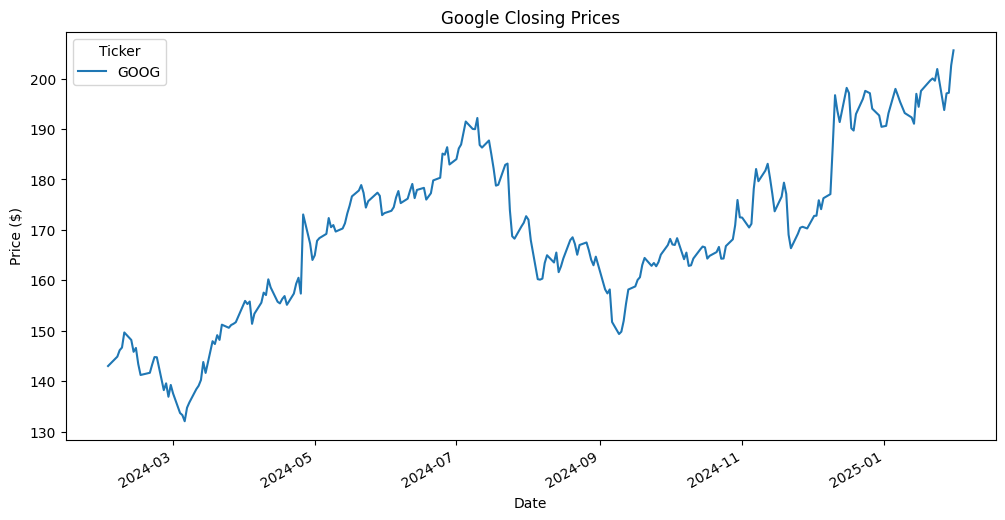

In [ ]:
import pandas as pd
import yfinance as yf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt
import seaborn as sns

data = yf.download('GOOG',start=start_date,end=end_date,progress=False)

data = data[["Open", "High", "Low", "Close", "Volume"]]

data['Close'].plot(figsize=(12,6))
plt.title('Google Closing Prices')
plt.ylabel('Price ($)')
plt.show()

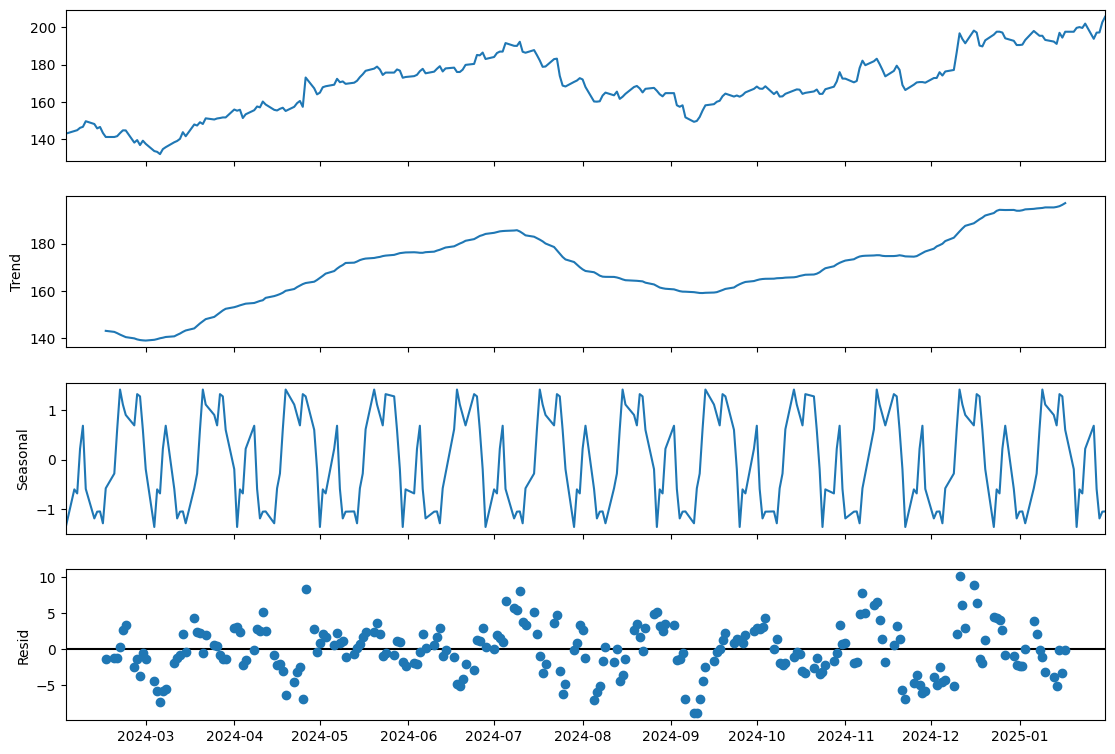

In [ ]:
data_close = data['Close'].asfreq('B').ffill()

decomposition = seasonal_decompose(data_close,period=21,model='additive')

fig = decomposition.plot()
fig.set_size_inches(12,8)
plt.show()

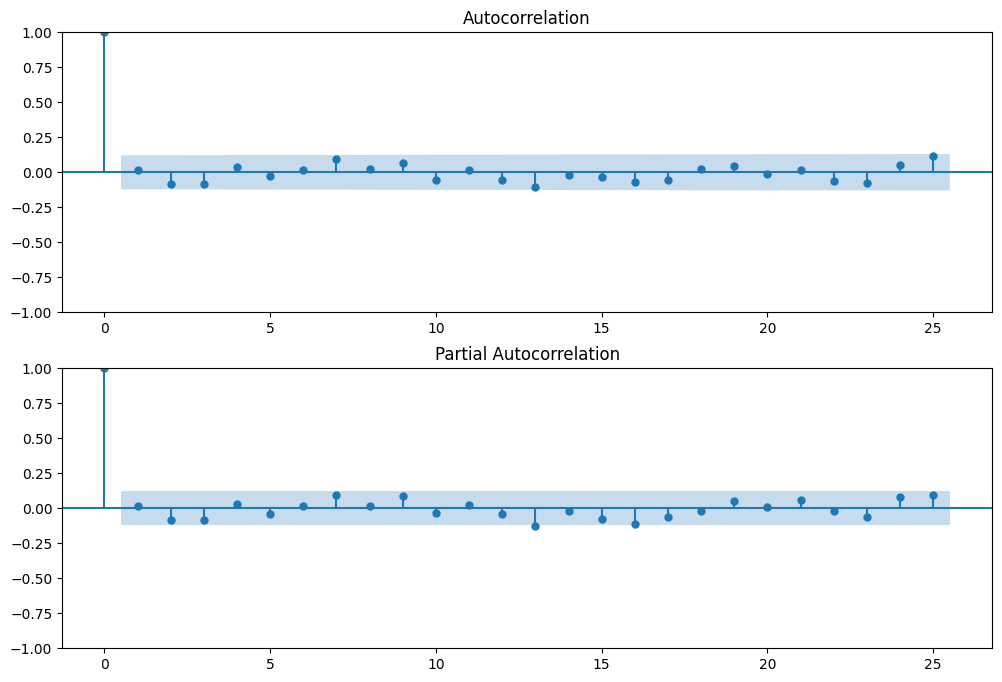

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(12, 8))
plot_acf(data_close.diff().dropna(),ax=ax1)
plot_pacf(data_close.diff().dropna(),ax=ax2)
plt.show()

In [ ]:
model_arima = ARIMA(data_close,order=(5,1,1))
res_arima = model_arima.fit()

print(res_arima.summary())

forecast = res_arima.get_forecast(steps=20)
forecast_ci = forecast.conf_int()

                               SARIMAX Results                                
Dep. Variable:                   GOOG   No. Observations:                  261
Model:                 ARIMA(5, 1, 1)   Log Likelihood                -641.243
Date:                Sat, 01 Feb 2025   AIC                           1296.485
Time:                        14:11:52   BIC                           1321.410
Sample:                    02-02-2024   HQIC                          1306.505
                         - 01-31-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0742      1.952     -0.038      0.970      -3.900       3.751
ar.L2         -0.0741      0.082     -0.909      0.363      -0.234       0.086
ar.L3         -0.0890      0.162     -0.550      0.5

In [ ]:
prediction = res_arima.predict(start=len(data_close),end=len(data_close)+50,dynamic=True)
prediction

,predicted_mean
2025-02-03,205.708249
2025-02-04,204.879820
2025-02-05,204.835289
2025-02-06,204.786888
2025-02-07,204.763932
2025-02-10,204.743413
2025-02-11,204.779381
2025-02-12,204.780366
2025-02-13,204.780479
2025-02-14,204.777383


<Axes: xlabel='Date'>

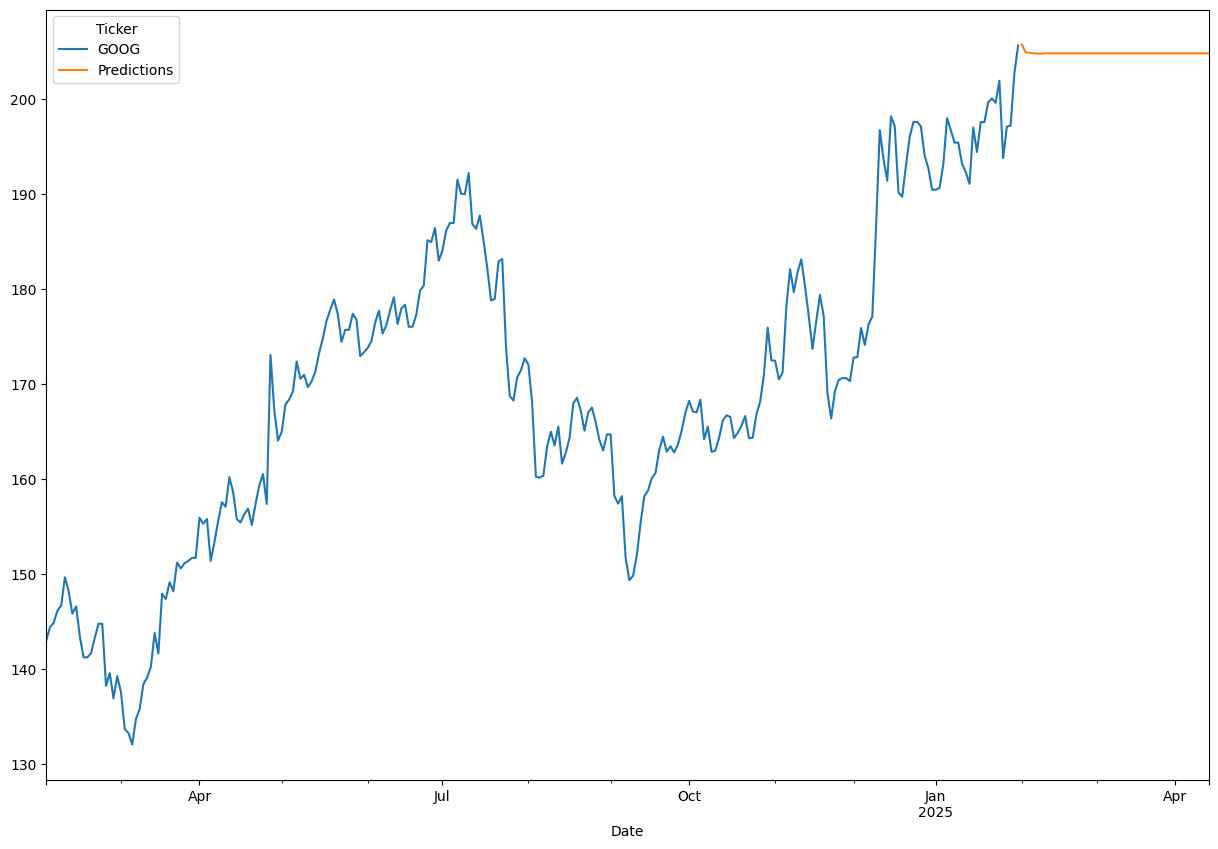

In [ ]:
data_close.plot(legend=True,label="Training Data",figsize=(15,10))
prediction.plot(legend=True,label="Predictions")

In [ ]:
model_sarima = SARIMAX(data_close, order=(1,1,1),seasonal_order=(5,1,1,12))
res_sarima = model_sarima.fit()

print(res_sarima.summary())
sarima_forecast = res_sarima.get_forecast(steps=20)

                                     SARIMAX Results                                      
Dep. Variable:                               GOOG   No. Observations:                  261
Model:             SARIMAX(1, 1, 1)x(5, 1, 1, 12)   Log Likelihood                -632.763
Date:                            Sat, 01 Feb 2025   AIC                           1283.527
Time:                                    14:11:21   BIC                           1315.148
Sample:                                02-02-2024   HQIC                          1296.256
                                     - 01-31-2025                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5404      1.719      0.314      0.753      -2.829       3.910
ma.L1         -0.5640      1.695   

In [ ]:
pred = res_sarima.predict(start=len(data_close),end=len(data_close)+50,dynamic=True)
pred

,predicted_mean
2025-02-03,204.809829
2025-02-04,206.943455
2025-02-05,206.693805
2025-02-06,206.928340
2025-02-07,208.773952
2025-02-10,208.739366
2025-02-11,209.376396
2025-02-12,208.127205
2025-02-13,206.982503
2025-02-14,209.267107


<Axes: xlabel='Date'>

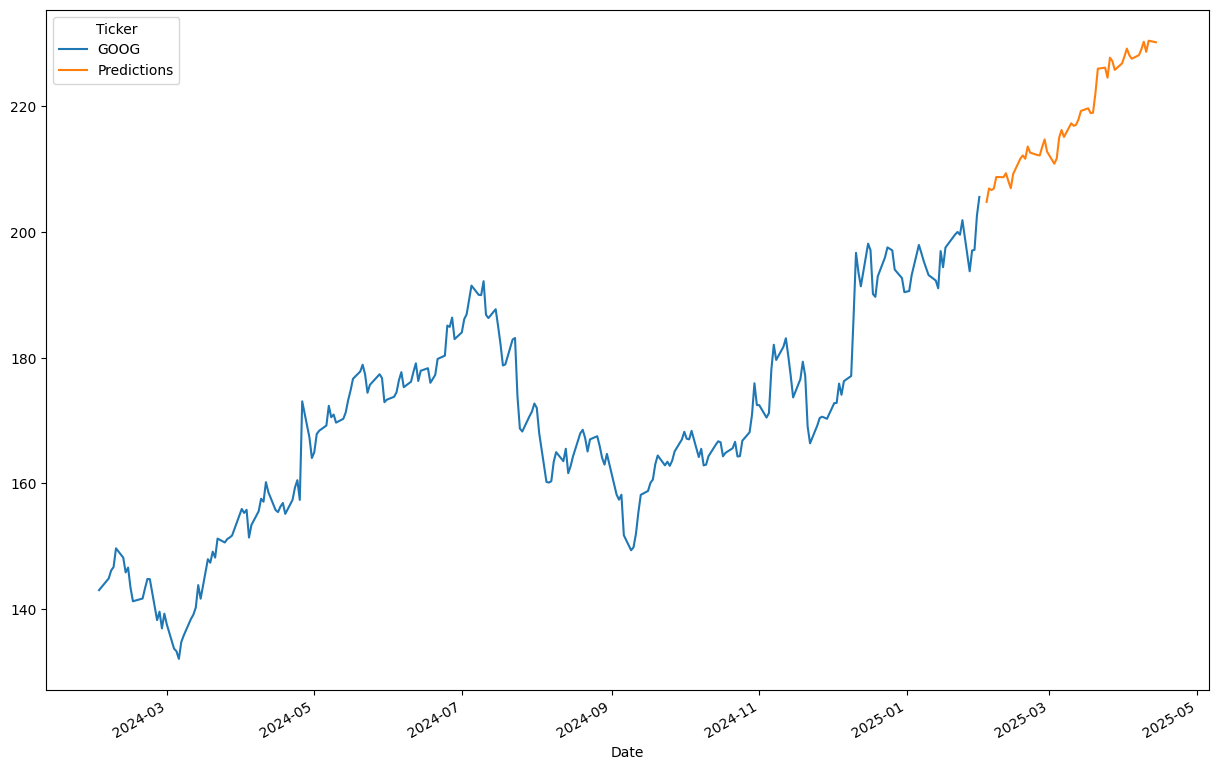

In [ ]:
data["Close"].plot(legend=True,label="Training Data",figsize=(15, 10))
pred.plot(legend=True,label="Predictions")

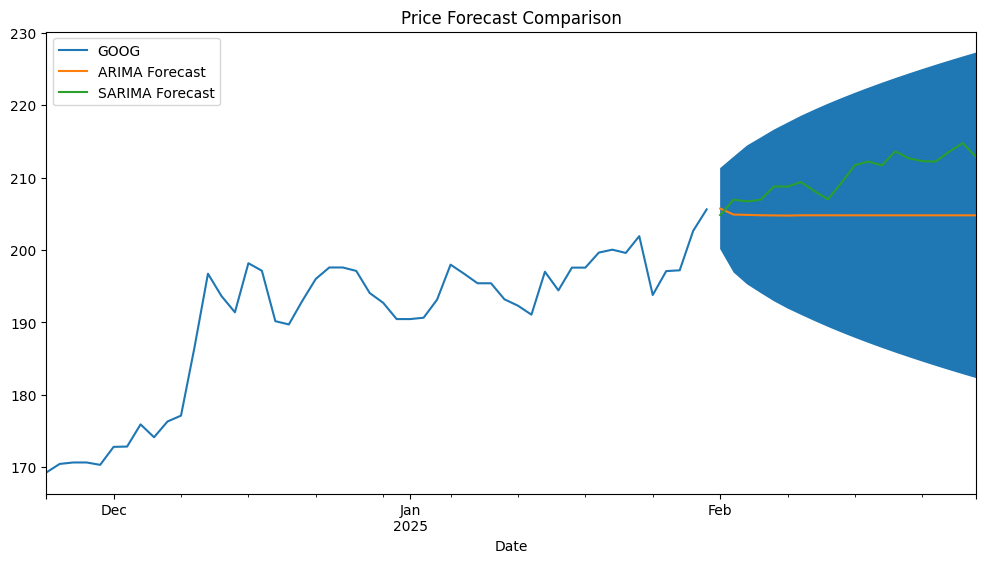

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
data_close[-50:].plot(ax=ax, label='Observed')

forecast.predicted_mean.plot(ax=ax, label='ARIMA Forecast')
ax.fill_between(forecast_ci.index,forecast_ci.iloc[:, 0],forecast_ci.iloc[:, 1])

sarima_forecast.predicted_mean.plot(ax=ax,label='SARIMA Forecast')
plt.title('Price Forecast Comparison')
plt.legend()
plt.show()